# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="ticks") # эта функция меняет глобальные переменные: все последующие графики отрисовываются в том же стиле.
plt.rc('figure', figsize=(18, 6)) # устанавливаем размеры графиков по умолчанию
pd.set_option('display.max_columns', 100) # настрoим показ максимального количества столбцов

In [3]:
### YOUR CODE HERE ###
df = pd.read_csv('Mall_Customers.csv')
df.shape

(200, 5)

In [4]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # скрипка
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

In [5]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


In [6]:
# Анализ значений категориального признака Genre
df.Genre.value_counts()

Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64

В признаке Genre явно допущена оппечатка. Вместо Female указано Feemale. Исправим эту опечатку.

In [7]:
df['Genre'].replace('Feemale', 'Female', inplace=True)

In [8]:
df.Genre.value_counts()

Genre
Female    104
Male       77
Name: count, dtype: int64

In [9]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [10]:
df.isna().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [11]:
df.isna().sum() / df.shape[0]

CustomerID                0.000
Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64

In [12]:
df_miss_row = df[df.isna().sum(axis=1) >= 5]
df_miss_row.shape

(0, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,180.000000,180.000000,200.000000
mean,100.500000,39.894444,5615.433333,50.200000
std,57.879185,16.842848,74531.115872,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.000000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,135.000000,1000000.000000,99.000000


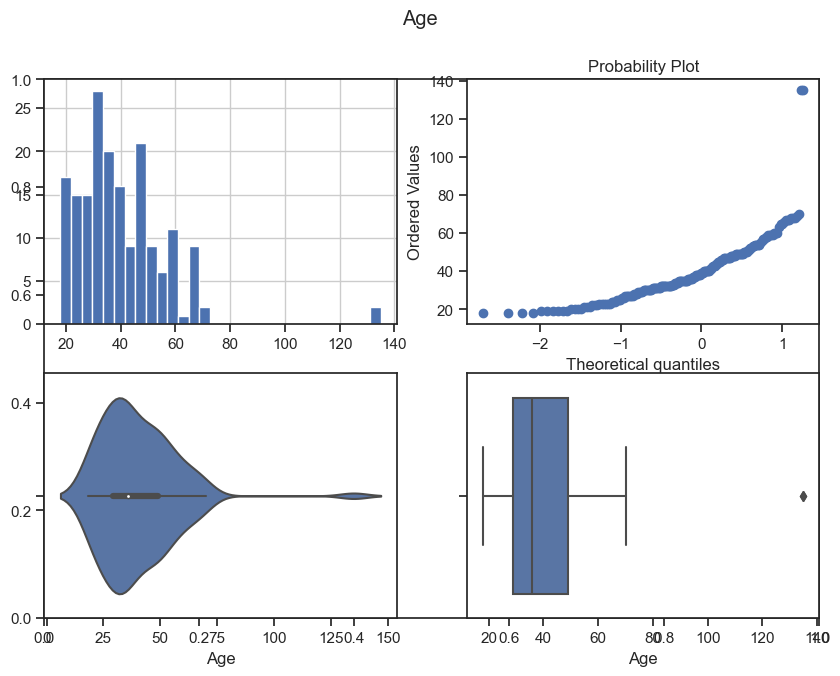

In [15]:
### YOUR CODE HERE ###
diagnostic_plots(df, 'Age', 'Age')

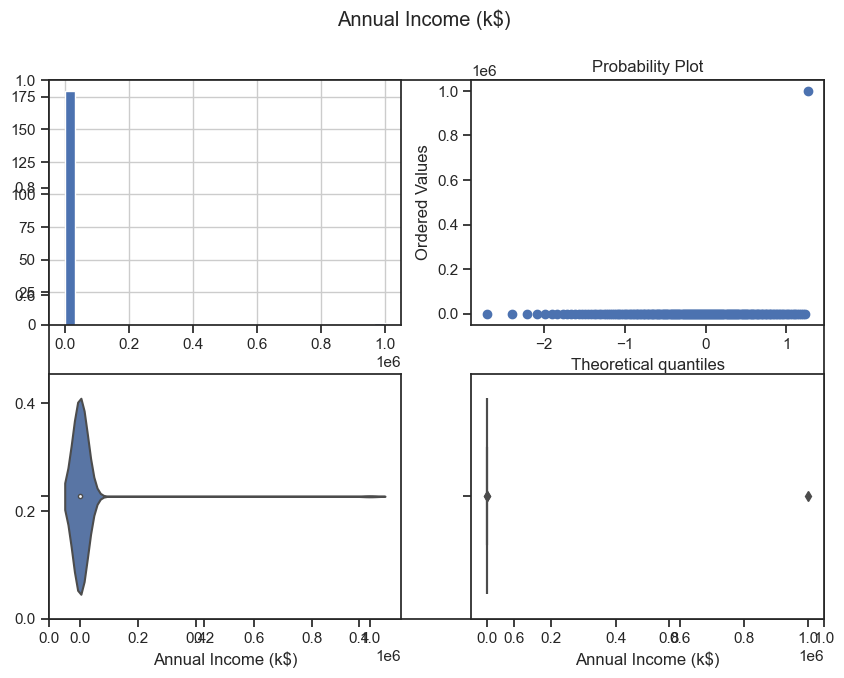

In [16]:
diagnostic_plots(df, 'Annual Income (k$)', 'Annual Income (k$)')

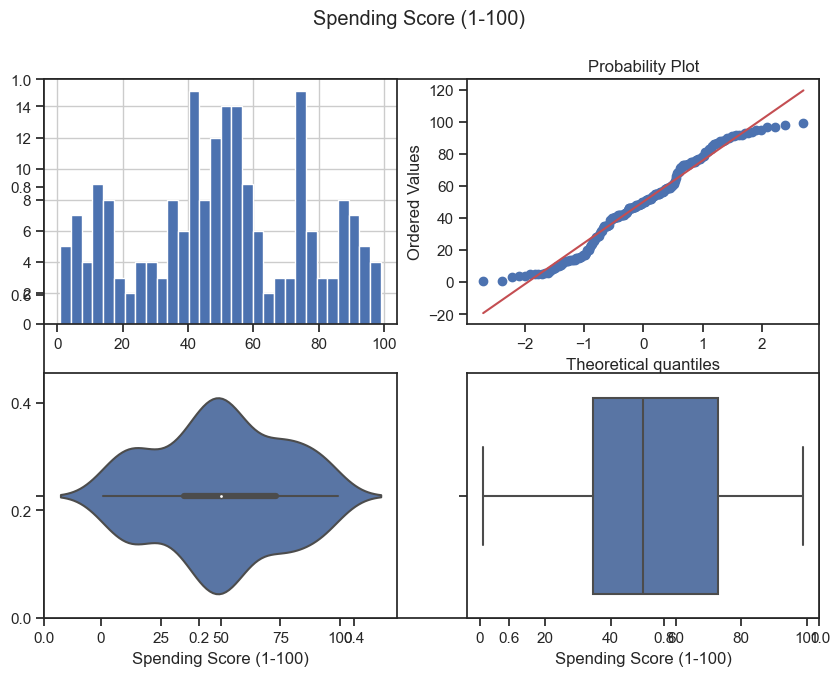

In [17]:
diagnostic_plots(df, 'Spending Score (1-100)', 'Spending Score (1-100)')

In [18]:
df[df.Age == 135].value_counts()

CustomerID  Genre  Age    Annual Income (k$)  Spending Score (1-100)
9           Male   135.0  19.0                3                         1
Name: count, dtype: int64

In [19]:
df[df['Annual Income (k$)'] == 1000000].value_counts()

CustomerID  Genre  Age   Annual Income (k$)  Spending Score (1-100)
157         Male   37.0  1000000.0           1                         1
Name: count, dtype: int64

Анализ признака Age показывает наличие аномального значения 135 лет (для человека такая продолжительность жизни не реальна). Данное значение еденичное и влияет на распределение. Принимаем решение удалить строку с этими данными.

Анализ признака Annual Income (годовой доход в тыс.долларов) показывает наличие выброса в 1000000 тысяч долларов. Людей с таким доходом  в год единицы. Данное значение единичное и сильно влияет на распределение. Принимаем решение удалить строку с этими данными.


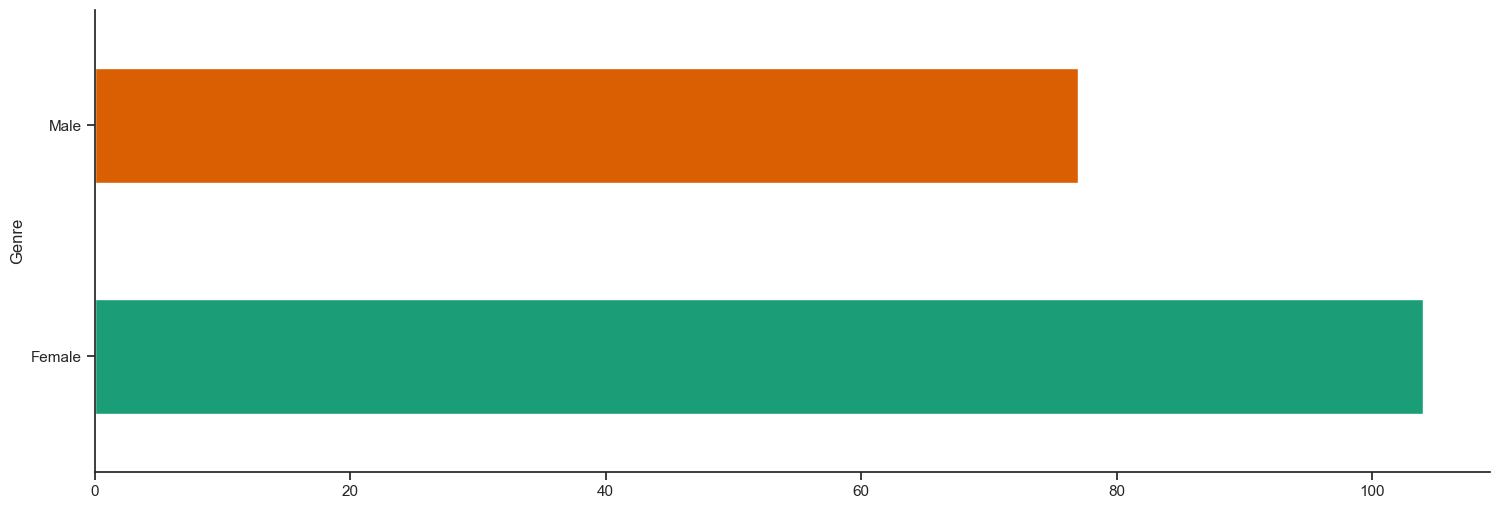

In [20]:
df.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
df['Genre'].describe()

count        181
unique         2
top       Female
freq         104
Name: Genre, dtype: object

In [22]:
# Проверим корреляцию пропущенных значений разных признаков. Корреляция очень слабая
df[['Genre', 'Age', 'Annual Income (k$)']].isnull().corr()

,Genre,Age,Annual Income (k$)
Genre,1.000000,-5.115701e-02,5.684112e-03
Age,-0.051157,1.000000e+00,3.854941e-17
Annual Income (k$),0.005684,3.854941e-17,1.000000e+00


In [23]:
df = df[df.Age != 135]

In [24]:
df = df[df['Annual Income (k$)'] != 1000000]

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,197.000000,177.000000,177.000000,197.000000
mean,101.152284,38.836158,60.683616,50.913706
std,57.421616,13.585221,25.972263,25.354782
min,1.000000,18.000000,15.000000,1.000000
25%,52.000000,29.000000,43.000000,35.000000
50%,101.000000,36.000000,61.000000,50.000000
75%,150.000000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28
197,198,Male,32.0,126.0,74
198,199,Male,NaN,137.0,18


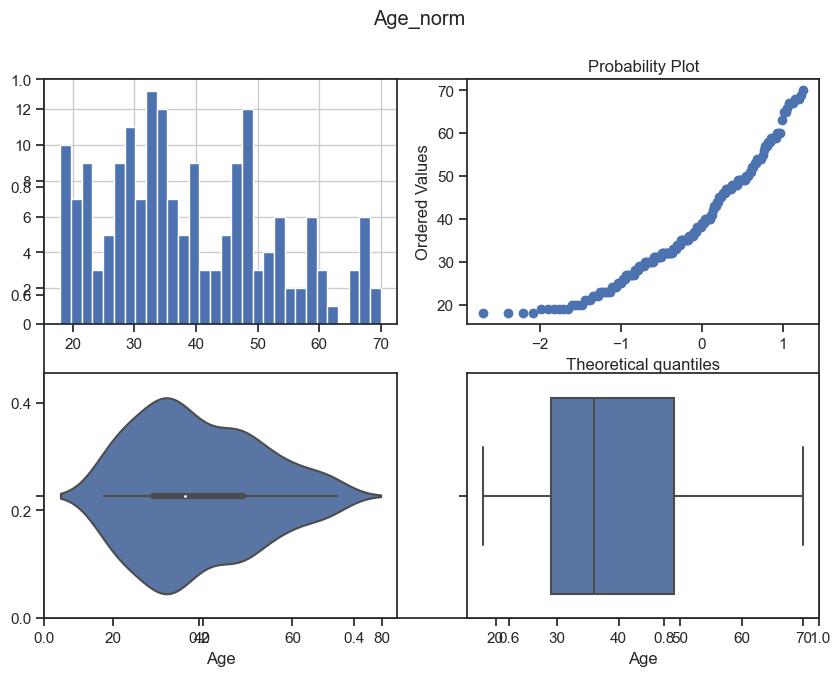

In [27]:
# Распределение и выбросы после удаления аномального значения
diagnostic_plots(df, 'Age', 'Age_norm')

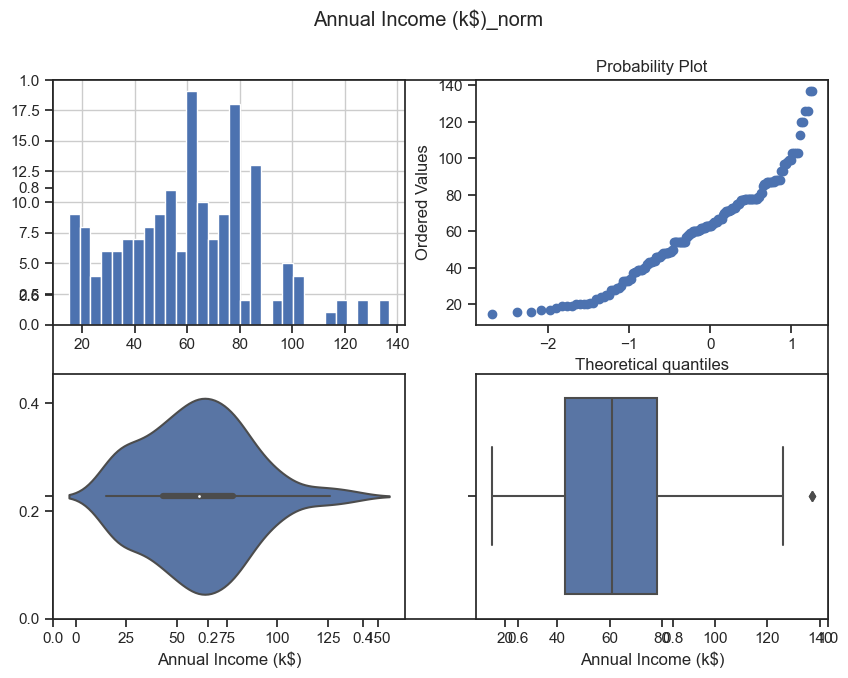

In [28]:
diagnostic_plots(df, 'Annual Income (k$)', 'Annual Income (k$)_norm')

Выводы:
1. Пропущенные значения находятся в числовых признаках (Age и Annual Income) и категориальной переменной Genre. Процент пропущенных значений Genre = 9,5%, Age = 10%,  Annual Income = 10%.
2. Распределение признаков.
- Genre (пол):
В признаке присутствуют два значения Female и Male. В данных бало выявлено 2 опечатки (Feemale) и исправлено на Female.
- Age (возраст):
Значения возраста изменяются от 18 до 135 лет. Возраст 135 лет является аномальным (такая продолжительность жизни людей нереальна). Такое значение единично и влияет на распределение. Для нормализации распределения удалили строку с этим значением.
- Annual Income (годовой доход покупателя, тысяч долларов):
Значения годового дохода изменяются от 15 тыс.долларов до 1 млрд.долларов. Доход в 1 млд.долларов в год не является аномальным, но людей с таким доходом единицы. Для данного набора данных это значение явно аномальное. Такое значение единично и сильно влияет на распределение. Для нормализации распределения удалили строку с этим значением.
- Spending Score (рейтинг покупателя, целевая переменная):
Значения рейтинга изменяются от 1 до 100. Распределение близко к нормальному.

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [29]:
data = df.copy()

In [30]:
X = data.drop('Spending Score (1-100)', axis=1)
y = data['Spending Score (1-100)']
y.columns = data['Spending Score (1-100)']

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

Заполнение значений для нескольких признаков.

В этом случае данные, которые находятся в соседних признаках (колонках) учитываются при заполнении.

Идея состоит в том, что признаки могут зависеть между собой, и такие зависимости необходимо использовать при заполнении пропусков.

В этом случае мы решаем отдельную задачу машинного обучения, рассматривая пропущенный признак как целевой (y), а остальные признаки как исходные (X).

Для решения задачи можно использовать различные методы машинного обучения. На практике чаще всего используется метод ближайших соседей.

Также проблема состоит в том, что практически все признаки могут содержать пропуски, и для их заполнения другие признаки необходимо предварительно импьютировать известными методами(возникает подобие циклических ссылок).

Для решения этой задачи используется метод MICE (multivariate Imputation of Chained Equations). Существует расширение этого метода MissForest в котором используется случайный лес.

Применим метод MICI для заполнения пропусков в наших данных.

In [32]:
Xtrain

,CustomerID,Genre,Age,Annual Income (k$)
53,54,Male,59.0,43.0
125,126,Female,31.0,70.0
16,17,Female,35.0,21.0
60,61,Male,70.0,46.0
21,22,Male,25.0,24.0
...,...,...,...,...
135,136,NaN,29.0,73.0
139,140,Female,35.0,74.0
74,75,Male,59.0,54.0
142,143,Female,28.0,76.0


In [33]:
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=1),
    max_iter=10,
    random_state=1)

num_columns = ['Age', 'Annual Income (k$)']

In [34]:
Xtrain[num_columns] = imputer.fit_transform(Xtrain[num_columns])

In [35]:
Xtrain.isnull().sum()

CustomerID             0
Genre                 15
Age                    0
Annual Income (k$)     0
dtype: int64

Заполнение пропусков в категориальном признаке

Для преобразования категориального признака Genre применим LabelEncoder-кодирование и закодируем пропущенных значения.

In [36]:
le = preprocessing.LabelEncoder()

In [37]:
imput_col = 'Genre'
imput_col_encoded = 'Genre_no'

In [38]:
le.fit(Xtrain.loc[:, imput_col])

LabelEncoder()

In [39]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Female': 0, 'Male': 1, nan: 2}

In [40]:
Xtrain[imput_col_encoded] = le.transform(Xtrain[imput_col])
Xtrain[['CustomerID', 'Genre', 'Genre_no']].head(7)

,CustomerID,Genre,Genre_no
53,54,Male,1
125,126,Female,0
16,17,Female,0
60,61,Male,1
21,22,Male,1
61,62,Male,1
41,42,Male,1


In [41]:
Xtrain[imput_col_encoded] = Xtrain[imput_col_encoded].map(lambda x: np.nan if x == 2 else x)
Xtrain

,CustomerID,Genre,Age,Annual Income (k$),Genre_no
53,54,Male,59.0,43.000000,1.0
125,126,Female,31.0,70.000000,0.0
16,17,Female,35.0,21.000000,0.0
60,61,Male,70.0,46.000000,1.0
21,22,Male,25.0,24.000000,1.0
...,...,...,...,...,...
135,136,NaN,29.0,73.000000,NaN
139,140,Female,35.0,74.000000,0.0
74,75,Male,59.0,54.000000,1.0
142,143,Female,28.0,76.000000,0.0


In [42]:
imputer_genre = IterativeImputer(random_state=1)

In [43]:
Xtrain_imputer_genre = Xtrain.loc[:, ['Age', 'Genre_no', 'Annual Income (k$)']]
Xtrain_imputer_genre.head()

,Age,Genre_no,Annual Income (k$)
53,59.0,1.0,43.0
125,31.0,0.0,70.0
16,35.0,0.0,21.0
60,70.0,1.0,46.0
21,25.0,1.0,24.0


In [44]:
imputer_genre.fit(Xtrain_imputer_genre)

IterativeImputer(random_state=1)

In [45]:
df_imputed_train = imputer_genre.transform(Xtrain_imputer_genre)
df_imputed_train[: 10]# пропущенные значения в Genre изменились на чилсла от 0 до 1

array([[59.        ,  1.        , 43.        ],
       [31.        ,  0.        , 70.        ],
       [35.        ,  0.        , 21.        ],
       [70.        ,  1.        , 46.        ],
       [25.        ,  1.        , 24.        ],
       [19.        ,  1.        , 46.        ],
       [24.        ,  1.        , 38.        ],
       [23.        ,  0.        , 62.        ],
       [31.        ,  0.        , 81.        ],
       [24.        ,  0.40503474, 60.        ]])

Округлим пропущенные значения в Genre

In [46]:
df_imputed_train[:, 1].round()

array([1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0.])

In [47]:
# заменим пропущенные значения Genre_no Xtrain
Xtrain.loc[:, [imput_col_encoded]] = df_imputed_train[:, 1].round()
Xtrain

,CustomerID,Genre,Age,Annual Income (k$),Genre_no
53,54,Male,59.0,43.000000,1.0
125,126,Female,31.0,70.000000,0.0
16,17,Female,35.0,21.000000,0.0
60,61,Male,70.0,46.000000,1.0
21,22,Male,25.0,24.000000,1.0
...,...,...,...,...,...
135,136,NaN,29.0,73.000000,0.0
139,140,Female,35.0,74.000000,0.0
74,75,Male,59.0,54.000000,1.0
142,143,Female,28.0,76.000000,0.0


In [48]:
Genre_imputed = list(le.inverse_transform(Xtrain[imput_col_encoded].round().astype(int)))
Genre_imputed[: 10]

['Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female']

In [49]:
Xtrain['Genre'] = Genre_imputed
Xtrain

,CustomerID,Genre,Age,Annual Income (k$),Genre_no
53,54,Male,59.0,43.000000,1.0
125,126,Female,31.0,70.000000,0.0
16,17,Female,35.0,21.000000,0.0
60,61,Male,70.0,46.000000,1.0
21,22,Male,25.0,24.000000,1.0
...,...,...,...,...,...
135,136,Female,29.0,73.000000,0.0
139,140,Female,35.0,74.000000,0.0
74,75,Male,59.0,54.000000,1.0
142,143,Female,28.0,76.000000,0.0


Удалим признак Genre_no из Xtrain

In [50]:
Xtrain = Xtrain.drop('Genre_no', axis=1)

In [53]:
Xtrain.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

Запишим очищенный от пропусков Xtrain для дальнейшей работы

In [54]:
Xtrain.to_csv('Mall_Customers_train.csv', index = False)

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


Аномалии я удалила до разделения, чтобы корректно заполнить пропуски в данных.


In [55]:
### YOUR CODE HERE ###
Xrain = pd.read_csv('Mall_Customers_train.csv')
Xrain

,CustomerID,Genre,Age,Annual Income (k$)
0,54,Male,59.0,43.000000
1,126,Female,31.0,70.000000
2,17,Female,35.0,21.000000
3,61,Male,70.0,46.000000
4,22,Male,25.0,24.000000
...,...,...,...,...
152,136,Female,29.0,73.000000
153,140,Female,35.0,74.000000
154,75,Male,59.0,54.000000
155,143,Female,28.0,76.000000


In [56]:
Xrain.describe()

,CustomerID,Age,Annual Income (k$)
count,157.000000,157.000000,157.000000
mean,101.222930,38.619363,60.384309
std,56.986233,13.097591,24.650589
min,1.000000,18.000000,15.000000
25%,55.000000,29.000000,45.201667
50%,99.000000,36.000000,60.000000
75%,149.000000,48.000000,77.000000
max,200.000000,70.000000,137.000000


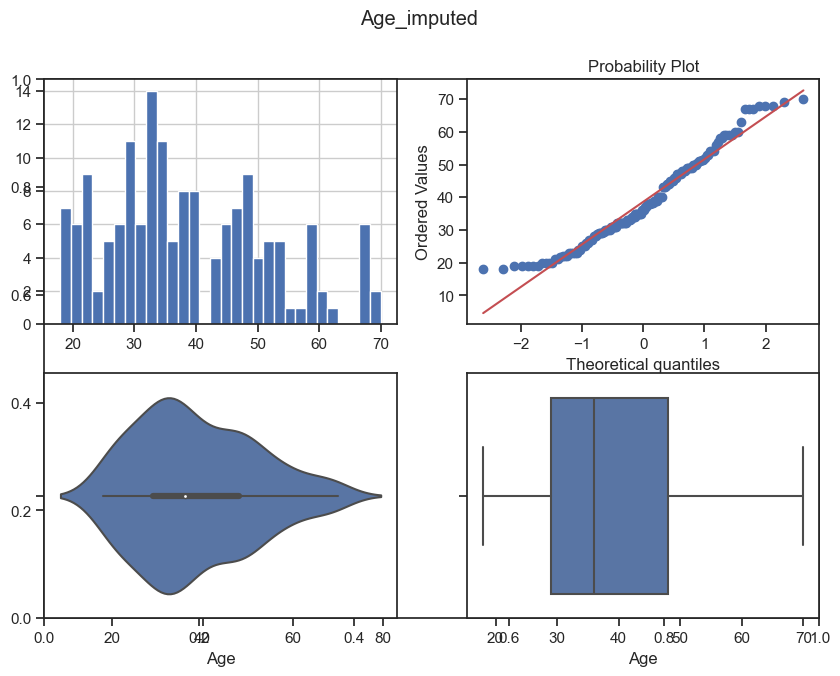

In [57]:
diagnostic_plots(Xrain, 'Age', 'Age_imputed')

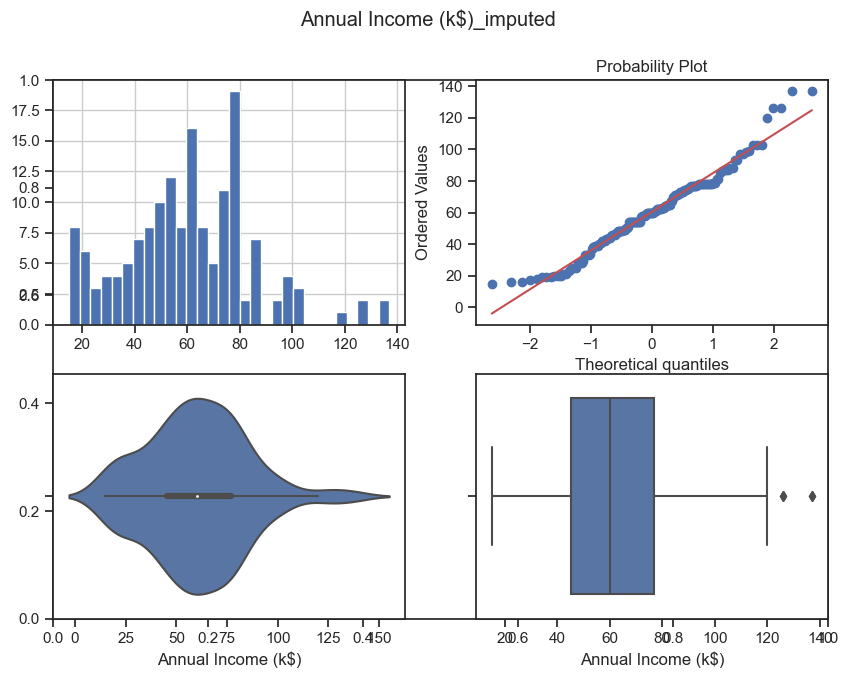

In [58]:
diagnostic_plots(Xrain, 'Annual Income (k$)', 'Annual Income (k$)_imputed')

В признаке Age (возраст) выбросов нет.

В признаке Annual Income (годовой доход в тыс.долларов) выбросы есть

In [59]:
# Функция расчета IQR (межквартильного размаха)
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

In [60]:
income_bounds = calculate_iqr_boundaries(Xrain['Annual Income (k$)'])
income_bounds

(-2.49583333333333, 124.69749999999999)

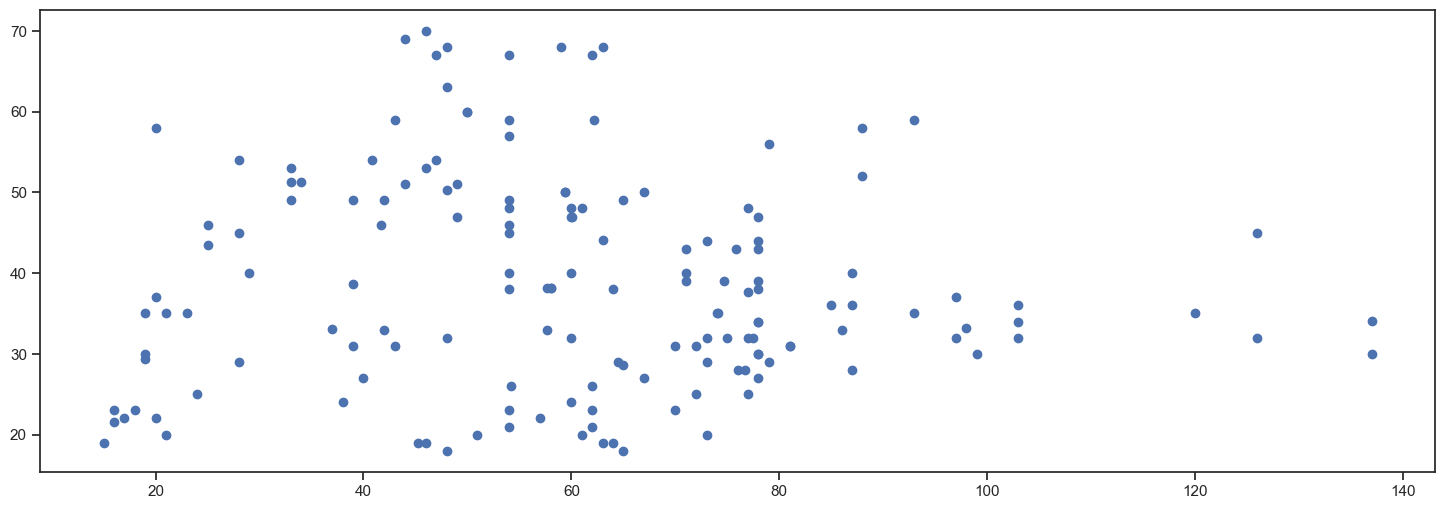

In [61]:
plt.scatter(Xrain['Annual Income (k$)'], Xtrain['Age'])

Из графика зависимости дохода от возраста видно, что в возрате от 32 до 46 лет есть несколько клиентов с доходом от 124,69 до 137 тыс.долларов в год. Это корректный доход клиентов. Считаю некорректным менять их на данные в деапазоне 75%(в задании предложено заменить!!!) и тем более удалять после разделения данных на train и test c выделением вектора целевой переменной(удалять выбросы надо до разделения!!!!!!).
В продакшине "придут" данные с таким доходом клиентов и модель выдаст некорректный прогноз, так как при обучении модели эти данные были заменены или удалены. Пусть лучше качество на Tкain и Test будет хуже, чем потом модель на других данных будет ошибаться. И обсудить этот вопрос с бизнес-заказчиком.

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


Для ускорения алгоритма машинного обучения применим нормализацию StandardScaler. В данных признака Annual Income есть выбросы и поэтому нормализация MinMaxScaler менее предпочтительна(чувствительна к выбросам сильнее чем StandardScaler).

In [62]:
X_train = Xtrain[['Age', 'Annual Income (k$)']]

In [63]:
scaler = StandardScaler()

In [64]:
Xtrain_scaled = scaler.fit_transform(X_train)
df_Xtain_scaled = pd.DataFrame(Xtrain_scaled, columns=X_train.columns)

In [65]:
df_Xtain_scaled

,Age,Annual Income (k$)
0,1.561039,-0.707486
1,-0.583599,0.391328
2,-0.277222,-1.602815
3,2.403576,-0.585395
4,-1.043165,-1.480725
...,...,...
152,-0.736788,0.513418
153,-0.277222,0.554115
154,1.561039,-0.259821
155,-0.813382,0.635509


In [66]:
Xtrain[['Age', 'Annual Income (k$)']] = df_Xtain_scaled
Xtrain

,CustomerID,Genre,Age,Annual Income (k$)
53,54,Male,-1.426136,0.025057
125,126,Female,0.641908,-0.014419
16,17,Female,-0.660194,3.118013
60,61,Male,0.412126,0.716902
21,22,Male,0.795097,-0.870273
...,...,...,...,...
135,136,Female,0.718503,0.025057
139,140,Female,1.331257,0.757599
74,75,Male,-0.200628,1.083173
142,143,Female,-0.353817,0.716902


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

В категориальном признаке Genre после очистки два значения Male(мужской пол) и Female(женский пол). Для кодирования применим метод LabelEncoder.

In [67]:
### YOUR CODE HERE ###
labelencoder = preprocessing.LabelEncoder()

In [68]:
Xtrain.loc[:, 'Genre'] = labelencoder.fit_transform(Xtrain.loc[:, 'Genre'])

In [69]:
Xtrain

,CustomerID,Genre,Age,Annual Income (k$)
53,54,1,-1.426136,0.025057
125,126,0,0.641908,-0.014419
16,17,0,-0.660194,3.118013
60,61,1,0.412126,0.716902
21,22,1,0.795097,-0.870273
...,...,...,...,...
135,136,0,0.718503,0.025057
139,140,0,1.331257,0.757599
74,75,1,-0.200628,1.083173
142,143,0,-0.353817,0.716902


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [70]:
Xtest.describe()

,CustomerID,Age,Annual Income (k$)
count,40.000000,38.000000,37.000000
mean,100.875000,39.578947,61.972973
std,59.840895,13.728313,26.962408
min,5.000000,18.000000,17.000000
25%,42.500000,30.000000,39.000000
50%,106.500000,38.000000,63.000000
75%,154.250000,49.000000,86.000000
max,195.000000,66.000000,120.000000


In [71]:
Xtest[num_columns] = imputer.transform(Xtest[num_columns])

In [72]:
Xtest.describe()

,CustomerID,Age,Annual Income (k$)
count,40.000000,40.000000,40.000000
mean,100.875000,39.492500,61.324569
std,59.840895,13.377351,26.028367
min,5.000000,18.000000,17.000000
25%,42.500000,30.000000,39.750000
50%,106.500000,38.000000,62.500000
75%,154.250000,49.000000,80.000000
max,195.000000,66.000000,120.000000


In [73]:
Xtest.isnull().sum()

CustomerID            0
Genre                 3
Age                   0
Annual Income (k$)    0
dtype: int64

In [74]:
### YOUR CODE HERE ###
Xtest[imput_col_encoded] = le.transform(Xtest[imput_col])
Xtest[['CustomerID', 'Genre', 'Genre_no']].head(7)

,CustomerID,Genre,Genre_no
37,38,Female,0
30,31,Male,1
121,122,Female,0
175,176,Female,0
97,98,Female,0
31,32,Female,0
42,43,Male,1


In [75]:
Xtest[imput_col_encoded] = Xtest[imput_col_encoded].map(lambda x: np.nan if x == 2 else x)
Xtest.head(15)

,CustomerID,Genre,Age,Annual Income (k$),Genre_no
37,38,Female,30.0,34.000000,0.0
30,31,Male,60.0,30.000000,1.0
121,122,Female,37.5,67.000000,0.0
175,176,Female,30.0,88.000000,0.0
97,98,Female,27.0,60.000000,0.0
31,32,Female,21.0,53.946667,0.0
42,43,Male,48.0,39.000000,1.0
20,21,Male,35.0,24.000000,1.0
169,170,Male,32.0,87.000000,1.0
91,92,Male,18.0,59.000000,1.0


In [76]:
Xtest_imputer_genre = Xtest.loc[:, ['Age', 'Genre_no', 'Annual Income (k$)']]
Xtest_imputer_genre.head(15)

,Age,Genre_no,Annual Income (k$)
37,30.0,0.0,34.000000
30,60.0,1.0,30.000000
121,37.5,0.0,67.000000
175,30.0,0.0,88.000000
97,27.0,0.0,60.000000
31,21.0,0.0,53.946667
42,48.0,1.0,39.000000
20,35.0,1.0,24.000000
169,32.0,1.0,87.000000
91,18.0,1.0,59.000000


In [77]:
# Применим метод IterativeImputer на Xtest
df_imputed_test = imputer_genre.transform(Xtest_imputer_genre)
df_imputed_test[: 20]

array([[30.        ,  0.        , 34.        ],
       [60.        ,  1.        , 30.        ],
       [37.5       ,  0.        , 67.        ],
       [30.        ,  0.        , 88.        ],
       [27.        ,  0.        , 60.        ],
       [21.        ,  0.        , 53.94666667],
       [48.        ,  1.        , 39.        ],
       [35.        ,  1.        , 24.        ],
       [32.        ,  1.        , 87.        ],
       [18.        ,  1.        , 59.        ],
       [34.        ,  1.        , 78.        ],
       [24.        ,  0.        , 20.        ],
       [66.        ,  1.        , 63.        ],
       [38.        ,  0.41703321, 71.        ],
       [18.        ,  1.        , 33.        ],
       [65.        ,  0.43538149, 63.        ],
       [38.2       ,  0.        , 57.63333333],
       [47.        ,  1.        , 43.        ],
       [52.        ,  1.        , 23.        ],
       [55.        ,  0.        , 57.        ]])

In [78]:
Xtest.loc[:, [imput_col_encoded]] = df_imputed_test[:, 1].round()
Xtest.head(15)

,CustomerID,Genre,Age,Annual Income (k$),Genre_no
37,38,Female,30.0,34.000000,0.0
30,31,Male,60.0,30.000000,1.0
121,122,Female,37.5,67.000000,0.0
175,176,Female,30.0,88.000000,0.0
97,98,Female,27.0,60.000000,0.0
31,32,Female,21.0,53.946667,0.0
42,43,Male,48.0,39.000000,1.0
20,21,Male,35.0,24.000000,1.0
169,170,Male,32.0,87.000000,1.0
91,92,Male,18.0,59.000000,1.0


In [79]:
Genre_imputed_test = list(le.inverse_transform(Xtest[imput_col_encoded].round().astype(int)))
Genre_imputed_test[: 10]

['Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male']

In [80]:
Xtest['Genre'] = Genre_imputed_test
Xtest.head(15)

,CustomerID,Genre,Age,Annual Income (k$),Genre_no
37,38,Female,30.0,34.000000,0.0
30,31,Male,60.0,30.000000,1.0
121,122,Female,37.5,67.000000,0.0
175,176,Female,30.0,88.000000,0.0
97,98,Female,27.0,60.000000,0.0
31,32,Female,21.0,53.946667,0.0
42,43,Male,48.0,39.000000,1.0
20,21,Male,35.0,24.000000,1.0
169,170,Male,32.0,87.000000,1.0
91,92,Male,18.0,59.000000,1.0


In [81]:
Xtest = Xtest.drop('Genre_no', axis=1)

In [82]:
Xtest.head(15)

,CustomerID,Genre,Age,Annual Income (k$)
37,38,Female,30.0,34.000000
30,31,Male,60.0,30.000000
121,122,Female,37.5,67.000000
175,176,Female,30.0,88.000000
97,98,Female,27.0,60.000000
31,32,Female,21.0,53.946667
42,43,Male,48.0,39.000000
20,21,Male,35.0,24.000000
169,170,Male,32.0,87.000000
91,92,Male,18.0,59.000000


In [83]:
Xtest.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

In [87]:
Xtest.to_csv('Mall_Customers_test.csv', index = False)

In [88]:
Xtest = pd.read_csv('Mall_Customers_test.csv')
Xtest.head(15)

,CustomerID,Genre,Age,Annual Income (k$)
0,38,Female,30.0,34.000000
1,31,Male,60.0,30.000000
2,122,Female,37.5,67.000000
3,176,Female,30.0,88.000000
4,98,Female,27.0,60.000000
5,32,Female,21.0,53.946667
6,43,Male,48.0,39.000000
7,21,Male,35.0,24.000000
8,170,Male,32.0,87.000000
9,92,Male,18.0,59.000000


In [89]:
Xtest.describe()

,CustomerID,Age,Annual Income (k$)
count,40.000000,40.000000,40.000000
mean,100.875000,39.492500,61.324569
std,59.840895,13.377351,26.028367
min,5.000000,18.000000,17.000000
25%,42.500000,30.000000,39.750000
50%,106.500000,38.000000,62.500000
75%,154.250000,49.000000,80.000000
max,195.000000,66.000000,120.000000


In [90]:
Xtest.describe(include='object')

,Genre
count,40
unique,2
top,Female
freq,24


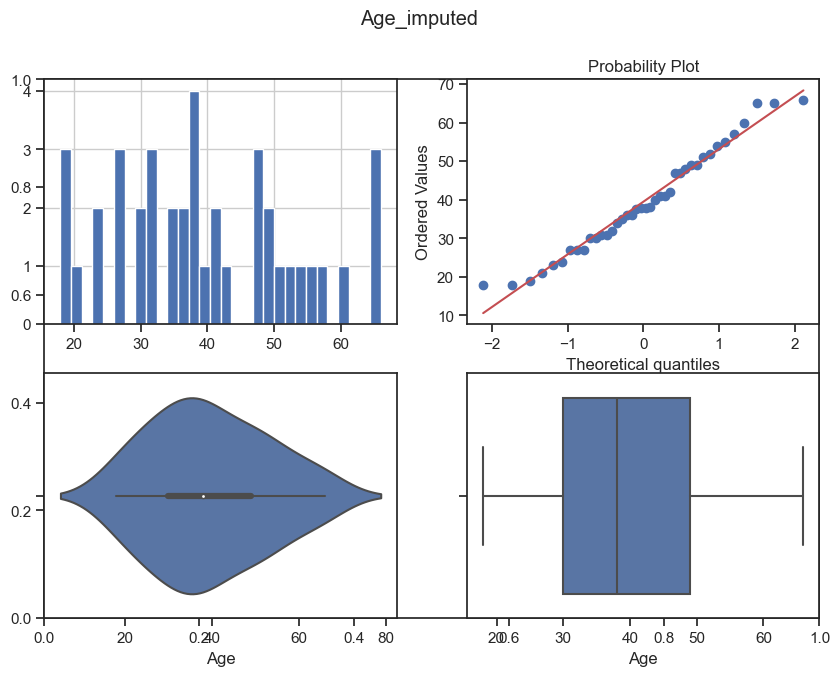

In [91]:
diagnostic_plots(Xtest, 'Age', 'Age_imputed')

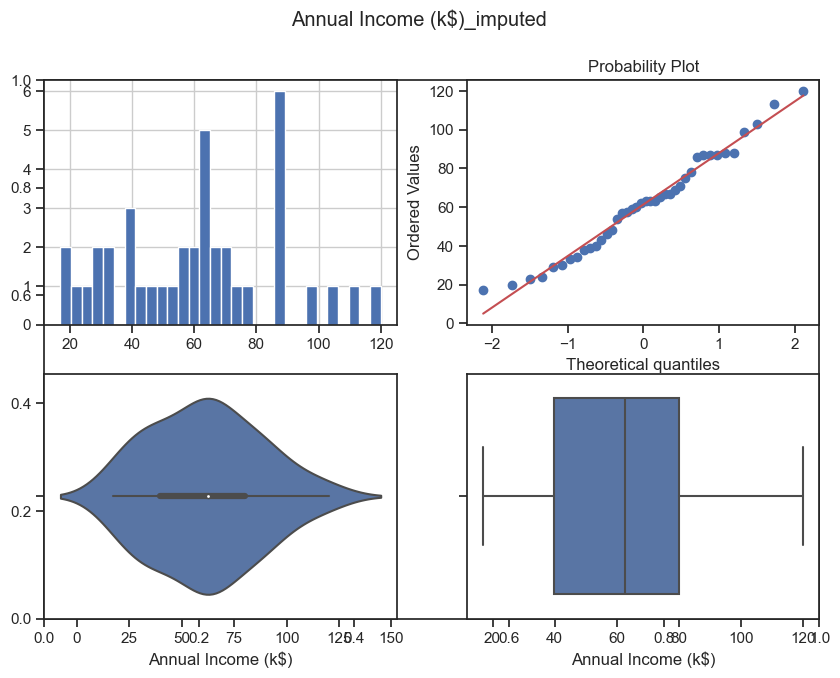

In [92]:
diagnostic_plots(Xtest, 'Annual Income (k$)', 'Annual Income (k$)_imputed')

Выбросов в переменных Age  и Annual Income в Xtest нет.

Для сопоставимости значений данных в Xtrain и Xtest применим к данным Xtest аналогичную нормализацию, что и в Xtrain.

In [93]:
X_test = Xtest[['Age', 'Annual Income (k$)']]

In [94]:
X_test_scaled = scaler.transform(X_test)
df_Xest_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [95]:
df_Xest_scaled.head(10)

,Age,Annual Income (k$)
0,-0.660194,-1.073757
1,1.637634,-1.236544
2,-0.085737,0.269237
3,-0.660194,1.123870
4,-0.889976,-0.015640
5,-1.349542,-0.261991
6,0.718503,-0.870273
7,-0.277222,-1.480725
8,-0.507005,1.083173
9,-1.579324,-0.056337


In [96]:
Xtest[['Age', 'Annual Income (k$)']] = df_Xest_scaled
Xtest.head(10)

,CustomerID,Genre,Age,Annual Income (k$)
0,38,Female,-0.660194,-1.073757
1,31,Male,1.637634,-1.236544
2,122,Female,-0.085737,0.269237
3,176,Female,-0.660194,1.123870
4,98,Female,-0.889976,-0.015640
5,32,Female,-1.349542,-0.261991
6,43,Male,0.718503,-0.870273
7,21,Male,-0.277222,-1.480725
8,170,Male,-0.507005,1.083173
9,92,Male,-1.579324,-0.056337


In [97]:
# кодирование категориального признака Genre
Xtest.loc[:, 'Genre'] = labelencoder.fit_transform(Xtest.loc[:, 'Genre'])

In [98]:
Xtest.head(10)

,CustomerID,Genre,Age,Annual Income (k$)
0,38,0,-0.660194,-1.073757
1,31,1,1.637634,-1.236544
2,122,0,-0.085737,0.269237
3,176,0,-0.660194,1.123870
4,98,0,-0.889976,-0.015640
5,32,0,-1.349542,-0.261991
6,43,1,0.718503,-0.870273
7,21,1,-0.277222,-1.480725
8,170,1,-0.507005,1.083173
9,92,1,-1.579324,-0.056337
